In [2]:
import pywt
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from fitter import HistFit
from distfit import distfit
from playsound import playsound
import IPython.display
from scipy import signal
import random

from sklearn.preprocessing import StandardScaler
import sklearn

# from utils import plot_projections

from scipy.stats import kurtosis, skew
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib widget

In [3]:
laser_dir = '/home/hashim/PHD/audio_data/Kareem/Laser/'
laser_files = list(glob.glob(os.path.join(laser_dir, '*.mp3')))
laser_files.sort()
print(laser_files)
print(len(laser_files))

['/home/hashim/PHD/audio_data/Kareem/Laser/laser_000.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_001.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_002.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_003.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_004.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_005.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_006.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_007.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_008.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_009.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_010.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_011.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_012.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_013.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_014.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_015.mp3', '/home/hashim/PHD/audio_data/Kareem/Laser/laser_016.mp3', '/home/hashim

In [4]:
orig_dir = '/home/hashim/PHD/audio_data/Kareem/Original/'
orig_files = list(glob.glob(os.path.join(orig_dir, '*.mp3')))
orig_files.sort()
print(orig_files)
print(len(orig_files))

['/home/hashim/PHD/audio_data/Kareem/Original/original_000.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_001.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_002.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_003.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_004.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_005.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_006.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_007.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_008.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_009.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_010.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_011.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_012.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_013.mp3', '/home/hashim/PHD/audio_data/Kareem/Original/original_014.mp3', '/home/hashim/PHD/audio_data/Kareem/Ori

In [5]:
laser_audio = laser_files[1]
original_audio = orig_files[1]

In [6]:
# playing orignal audio
playsound(original_audio)

In [7]:
# playing laser audio
playsound(laser_audio)

In [8]:
orig_audio_data, sr = librosa.load(original_audio, res_type='kaiser_fast', offset=1, duration=2)
orig_audio_data = librosa.util.normalize(orig_audio_data)

In [9]:
IPython.display.Audio(data=orig_audio_data, rate=sr)

In [10]:
laser_audio_data, sr = librosa.load(laser_audio, res_type='kaiser_fast', offset=1, duration=2)
laser_audio_data = librosa.util.normalize(laser_audio_data)

In [11]:
IPython.display.Audio(data=laser_audio_data, rate=sr)

In [12]:
# Original Audio
# Orig_Xf_mag = np.abs(np.fft.fft(orig_audio_data))
# freqs = np.fft.fftfreq(len(Orig_Xf_mag), d=1.0/sr)

In [13]:
# %matplotlib inline
# plt.plot(freqs, Orig_Xf_mag)
# plt.show()

In [14]:
f, Pxx_orig = signal.periodogram(orig_audio_data, sr)
A_rms_orig = np.sqrt(Pxx_orig)
# A_rms_norm_orig = A_rms_orig/np.linalg.norm(A_rms_orig)

In [15]:
# laser audio
# Laser_Xf_mag = np.abs(np.fft.fft(laser_audio_data))
# freqs = np.fft.fftfreq(len(Laser_Xf_mag), d=1.0/sr)

In [16]:
f, Pxx_laser = signal.periodogram(laser_audio_data, sr)
A_rms_laser = np.sqrt(Pxx_laser)
# A_rms_norm_laser = A_rms_laser/np.linalg.norm(A_rms_laser)

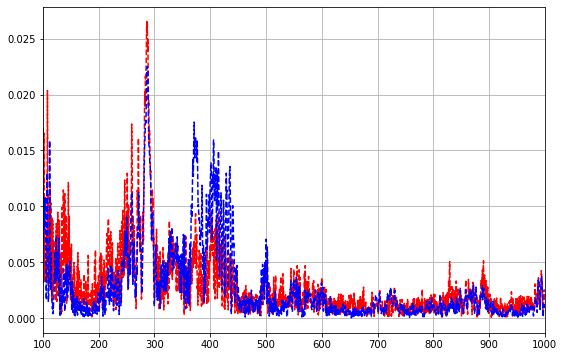

In [17]:
%matplotlib inline
plt.figure(figsize=(9, 6))
plt.plot(f, A_rms_laser, 'r--')
plt.plot(f, A_rms_orig, 'b--')
plt.xlim(100, 1000)
# plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [18]:
f

array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 1.10240e+04,
       1.10245e+04, 1.10250e+04])

## Second Audio Analysis

In [19]:
# define the true objective function
# def objective(x, a, b, c, d, e, f):
#  return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

def objective(x, a, b, c, d):
 return a * np.sin(b - x) + c * x**2 + d

In [28]:
file_number = 1

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels

def plot_freq_amp(file_number, max_freq=1500, out_path='../figures/freq_amp/', save_fig=False, plot_curve=False):
    laser_audio = laser_files[file_number]
    original_audio = orig_files[file_number]

    orig_audio_data, sr = librosa.load(original_audio, res_type='kaiser_fast', offset=1, duration=2)
    orig_audio_data = librosa.util.normalize(orig_audio_data)

    laser_audio_data, sr = librosa.load(laser_audio, res_type='kaiser_fast', offset=1, duration=2)
    laser_audio_data = librosa.util.normalize(laser_audio_data)

    f, Pxx_orig = signal.periodogram(orig_audio_data, sr)
    A_rms_orig = np.sqrt(Pxx_orig)

    f, Pxx_laser = signal.periodogram(laser_audio_data, sr)
    A_rms_laser = np.sqrt(Pxx_laser)
    
    ########## curve fit ############
#     popt_orig, _ = curve_fit(objective, freq, A_rms_orig)
#     popt_laser, _ = curve_fit(objective, freq, A_rms_laser)
    
#     # summarize the parameter values
# #     a_orig, b_orig, c_orig, d_orig, e_orig, f_orig = popt_orig
# #     a_laser, b_laser, c_laser, d_laser, e_laser, f_laser = popt_laser
    
#     a_orig, b_orig, c_orig, d_orig = popt_orig
#     a_laser, b_laser, c_laser, d_laser = popt_laser
    
#     # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(freq), max_freq, 1)
    
# #     # calculate the output for the range of original audio
# #     y_line_orig = objective(x_line, a_orig, b_orig, c_orig, d_orig, e_orig, f_orig)
    
# #     # calculate the output for the range of laser audio
# #     y_line_laser = objective(x_line, a_laser, b_laser, c_laser, d_laser, e_laser, f_laser)

#     # calculate the output for the range of original audio
#     y_line_orig = objective(x_line, a_orig, b_orig, c_orig, d_orig)
    
#     # calculate the output for the range of laser audio
#     y_line_laser = objective(x_line, a_laser, b_laser, c_laser, d_laser)

    %matplotlib inline
    plt.figure(figsize=(9, 6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Relative Amplitude')
    plt.plot(f, A_rms_laser, 'r--')
    plt.plot(f, A_rms_orig, 'b--')
    
#     if plot_curve:
#         # create a line plot for the mapping function
#         plt.plot(x_line, y_line_orig, color='black')
#         plt.plot(x_line, y_line_laser, color='black')
        
        
    plt.xlim(0, max_freq)
    plt.ylim(0, np.max((np.max(A_rms_orig), np.max(A_rms_laser))))
    plt.grid(True)
    
    if save_fig:
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        
        r_int = random.randint(0,10)
        plt.savefig(out_path + 'freq_amp_' + str(r_int) + '.eps', format='eps')
    
    plt.show()
    return A_rms_orig, A_rms_laser, f

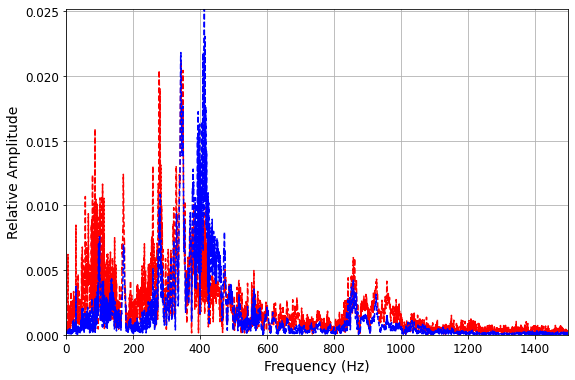

In [29]:
A_rms_orig, A_rms_laser, freq = plot_freq_amp(2, out_path='../figures/freq_amp/', save_fig=True, plot_curve=False)

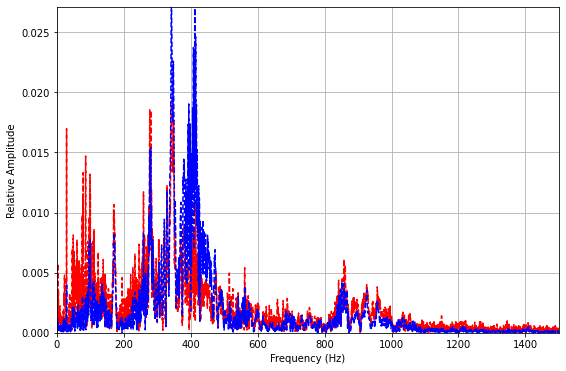

In [20]:
plot_freq_amp(3, save_fig=False)

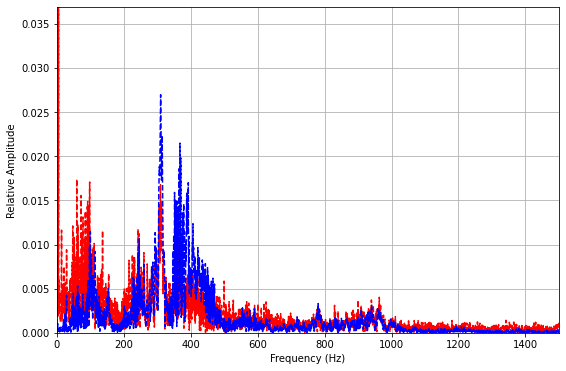

In [166]:
plot_freq_amp(7)

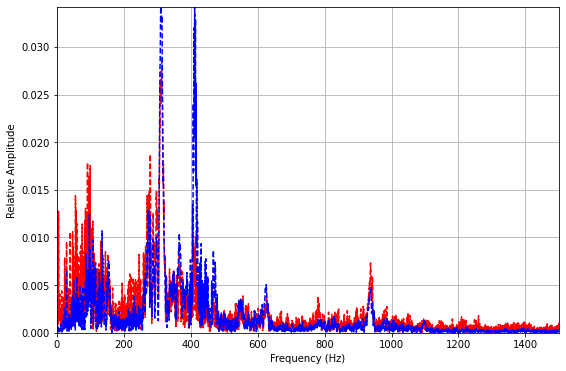

In [167]:
plot_freq_amp(14)

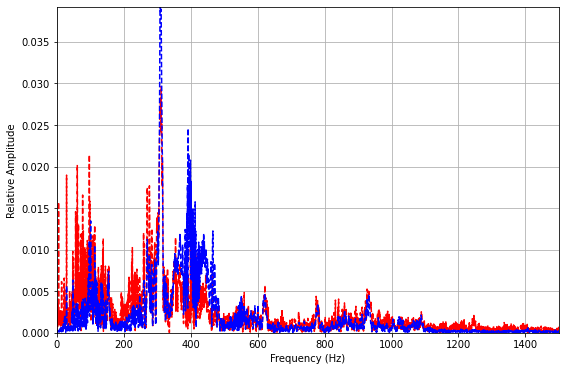

In [168]:
plot_freq_amp(20)

## Fitting Distributions

In [47]:
def plot_distribution(data, f, model = {}, title='', figsize=(10, 8), xlim=None, ylim=None, fig=None, ax=None, plot_hist=False, lw=2, c='blue'):
    
    # Store output and function parameters
    Param = {}
    Param['title'] = title
    Param['figsize'] = figsize
    Param['xlim'] = xlim
    Param['ylim'] = ylim

    # Make figure
    best_dist = model['distr']
    best_fit_name = model['name']
    best_fit_param = model['params']
    arg = model['params'][:-2]
    loc = model['params'][-2]
    scale = model['params'][-1]
    distline = getattr(stats, model['name'])

    # Get pdf boundaries
    getmin = distline.ppf(0.0000001, *arg, loc=loc, scale=scale) if arg else distline.ppf(0.0000001, loc=loc, scale=scale)
    getmax = distline.ppf(0.9999999, *arg, loc=loc, scale=scale) if arg else distline.ppf(0.9999999, loc=loc, scale=scale)

    # Take maximum/minimum based on empirical data to avoid long theoretical distribution tails
#     y, b = np.histogram(data, bins=n_bins, density=True)
    getmax = np.minimum(getmax, np.max(f))
    getmin = np.maximum(getmin, np.min(f))

    # Build pdf and turn into pandas Series
    x = np.linspace(getmin, getmax, len(data))
    y = distline.pdf(x, loc=loc, scale=scale, *arg)

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    if plot_hist:
        # Plot empirical data
        ax.hist(data, n_bins, density = True)
    
    # Plot pdf
    ax.plot(x, y, linewidth=lw, label=best_fit_name, color=c)
    
    ax.legend()
    ax.grid(True)
    
    return (fig, ax)

In [48]:
list_of_dists = get_common_distributions()

gen_dist = distfit(distr=list_of_dists)
laser_dist = distfit(distr=list_of_dists)

# n_bins = 500

In [49]:
# gen_dist = distfit()
gen_res = gen_dist.fit_transform(A_rms_orig, verbose=1)

# laser_dist = distfit()
laser_res = laser_dist.fit_transform(A_rms_laser, verbose=1)

(<Figure size 720x576 with 1 Axes>, <AxesSubplot:>)

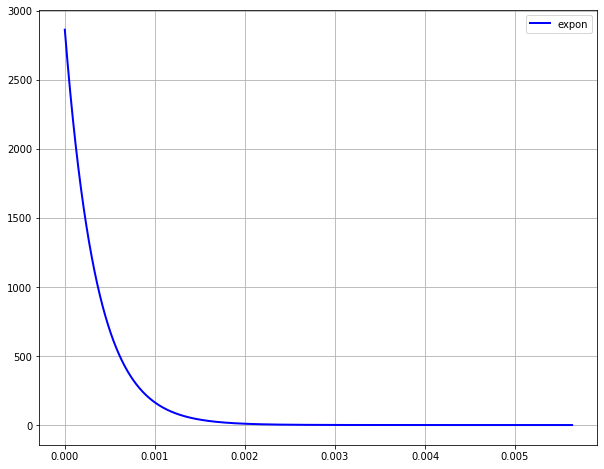

In [50]:
plot_distribution(A_rms_orig, f, model = gen_res['model'], plot_hist=False, c = 'blue')

# gen_dist.plot()

In [42]:
# plot_distribution(A_rms_laser, model = laser_res['model'], plot_hist=False, c = 'orange')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 720x576 with 1 Axes>, <AxesSubplot:>)

### Original Audio

In [68]:
# curve fit
popt, _ = curve_fit(objective, freq, A_rms_orig)

In [70]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(freq), max(freq), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)

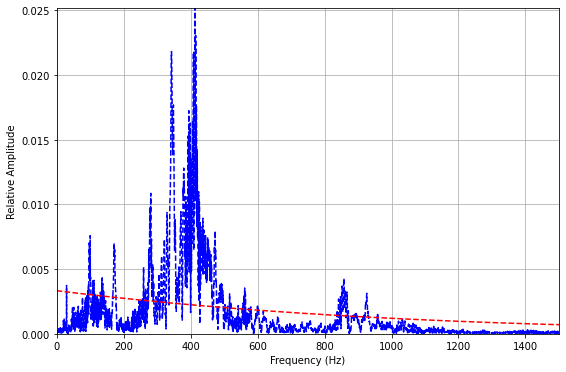

In [72]:
max_freq=1500

plt.figure(figsize=(9, 6))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Amplitude')
# plt.plot(f, A_rms_laser, 'r--')
plt.plot(freq, A_rms_orig, 'b--')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')

plt.xlim(0, max_freq)
plt.ylim(0, np.max((np.max(A_rms_orig), np.max(A_rms_laser))))
plt.grid(True)
plt.show()

In [128]:
f_short = freq[0:2000]
max(freq)

11025.0

In [130]:
A_rms_orig_short = A_rms_orig[0:2000]
A_rms_orig_short

array([8.4867124e-10, 1.7399775e-04, 1.6686076e-04, ..., 3.8752455e-04,
       5.5442395e-04, 5.0615851e-04], dtype=float32)

,sumsquare_error,aic,bic,kl_div
gamma,2.533997,1.276921e+06,-13319.406660,inf
cauchy,3.987447,8.139233e+04,-12420.300579,inf
lognorm,3.999806,2.551136e+05,-12406.510719,inf
expon,4.000000,8.706630e+08,-12414.014392,inf
norm,4.000000,6.018542e+13,-12414.014392,NaN


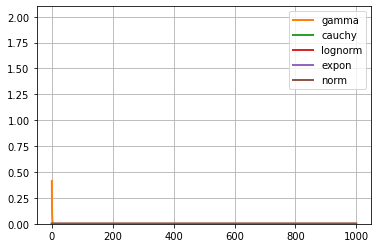

In [131]:
f = Fitter(A_rms_orig_short, distributions= get_common_distributions(), bins=f_short, density=False)
# f._density = False
f.fit()
f.summary()

499.6464354988466 115.27864041413397 0.3164665674452293


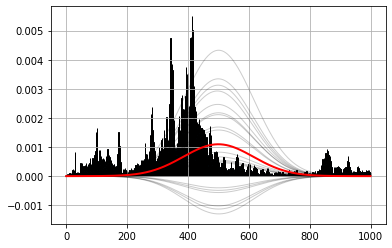

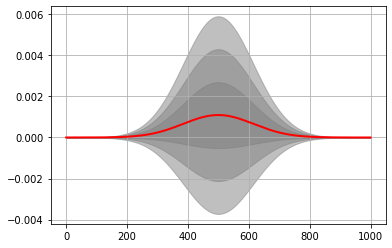

In [138]:
%matplotlib inline
hf = HistFit(X=f_short, Y=A_rms_orig_short)
hf.fit(error_rate=0.03, Nfit=20)
print(hf.mu, hf.sigma, hf.amplitude)

5512.499049360904 1270.0717019521937 -0.04594920565289458


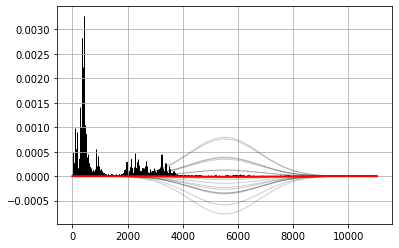

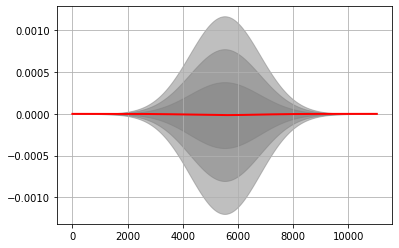

In [139]:
%matplotlib inline
hf = HistFit(X=freq, Y=A_rms_orig)
hf.fit(error_rate=0.03, Nfit=20)
print(hf.mu, hf.sigma, hf.amplitude)